In [2]:
import numpy as np
import matplotlib.pyplot as plt
from graspy.inference import SemiparametricTest
from graspy.embed import AdjacencySpectralEmbed
import seaborn as sns
import warnings
from graspy.simulations import binary_sbm
from graspy.simulations import rdpg_from_latent as rdpg
from graspy.utils import symmetrize
from scipy.linalg import orthogonal_procrustes

warnings.filterwarnings("ignore")
FONTSIZE = 30

In [3]:
k = 4 # the number of embedding dimensions for ASE
P = np.array([[0.9, 0.11, 0.13, 0.2],
              [0, 0.7, 0.1, 0.1], 
              [0, 0, 0.8, 0.1],
              [0, 0, 0, 0.85]])

P = symmetrize(P)
csize=50
A1 = binary_sbm([csize, csize, csize, csize], P)
X1 = AdjacencySpectralEmbed(k=k).fit_transform(A1)

In [4]:
A2 = rdpg(X1)
A3 = rdpg(X1)
A2 = symmetrize(A2)
A3 = symmetrize(A3)
Xhat2 = AdjacencySpectralEmbed(k=k).fit(A2).X
Xhat3 = AdjacencySpectralEmbed(k=k).fit(A3).X

In [5]:
spt = SemiparametricTest(n_bootstraps=1000, n_components=4, test_case='scalar-rotation')
spt.fit(A2, A3)
print('p = {}'.format(spt.p))

p = 0.4025


In [47]:
def make_triangle(points):
    return np.vstack((points, points[0,:]))
t1 = make_triangle(X1)
t2 = make_triangle(X2)

In [46]:
# two triangles rotated by 90 degrees
X1 = np.array([[0, 0], 
                    [3, 0], 
                    [3, -2]])

rotation = np.array([[0, 1],
                     [-1, 0]])

X2 = np.dot(X1, rotation)

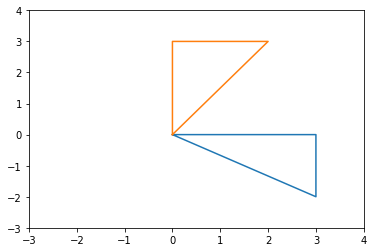

In [48]:
#plt.figure(figsize=(12,8))
plt.xlim([-3,4])
plt.ylim([-3,4])
plt.plot(t1[:,0], t1[:,1])
plt.plot(t2[:,0], t2[:,1])
plt.show()

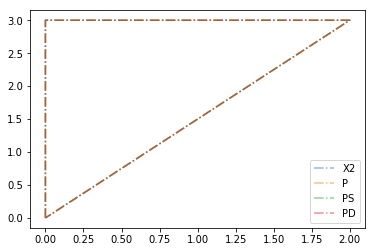

"R,s = orthogonal_procrustes(X1, X2)\nX3 = np.dot(X1, R)\nX4 = np.dot(X2, R.T)\nprint('X2', X2)\nprint(X3.astype(int))\nprint('X1', X1)\nprint(X4.astype(int))"

In [118]:
R,s = orthogonal_procrustes(X1, X2)
X23 = np.dot(X1,R)
X24 = s/np.sum(X1**2) * np.dot(X1,R)
X25 = X23 * np.nan_to_num(X22/X23.astype(int))
mx1, mx2, disp = procrustes(X1,X2)
t26 = make_triangle(np.nan_to_num(X23/mx1))
t23 = make_triangle(X23)
t24 = make_triangle(X24)
t25 = make_triangle(X25)
plt.plot(t22[:,0], t22[:,1], '-.', alpha=0.5, label='X2')
plt.plot(t23[:,0],t23[:,1],'-.',alpha=0.5,label='P')
plt.plot(t24[:,0],t24[:,1],'-.',alpha=0.5,label='PS')
plt.plot(t25[:,0],t25[:,1],'-.',alpha=0.5,label='PD')
#plt.plot(t26[:,0],t26[:,1],'-.',alpha=0.5,label='PSD')
plt.legend(loc=0)
plt.show()

'''R,s = orthogonal_procrustes(X1, X2)
X3 = np.dot(X1, R)
X4 = np.dot(X2, R.T)
print('X2', X2)
print(X3.astype(int))
print('X1', X1)
print(X4.astype(int))'''

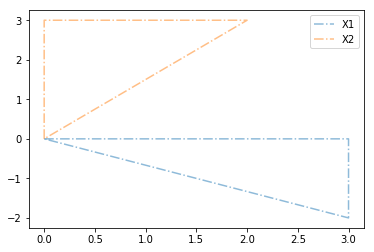

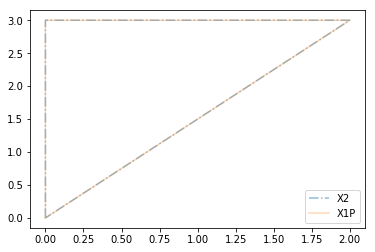

34.99999999999999


In [70]:
t3 = make_triangle(X3)
t4 = make_triangle(X4)
plt.plot(t1[:,0], t1[:,1], '-.', alpha=0.5, label='X1')
plt.plot(t2[:,0], t2[:,1], '-.', alpha=0.5, label='X2')
plt.legend(loc=0)
plt.show()
plt.plot(t2[:,0], t2[:,1], '-.', alpha=0.5, label='X2')
plt.plot(t3[:,0], t3[:,1], '-', alpha=0.3, label='X1P')
#plt.plot(t4[:,0], t4[:,1], '-', alpha=0.3, label='X4')
plt.legend(loc=0)
plt.show()
print(s)

In [51]:
X11 = np.array([[0, 0], 
                [3,0],
                [3, -2]])
X12 = np.dot(X11, rotation) 

X11 *= 5

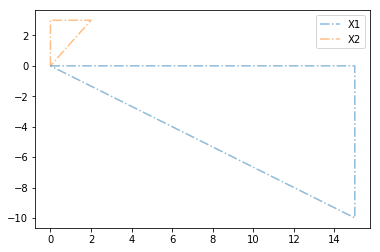

In [52]:
t11 = make_triangle(X11)
t12 = make_triangle(X12)
plt.plot(t11[:,0], t11[:,1], '-.', alpha=0.5, label='X1')
plt.plot(t12[:,0], t12[:,1], '-.', alpha=0.5, label='X2')
plt.legend(loc=0)
plt.show()

In [53]:
R,s = orthogonal_procrustes(X11, X12)
X13 = s/np.sum(X11**2) * np.dot(X11,R)

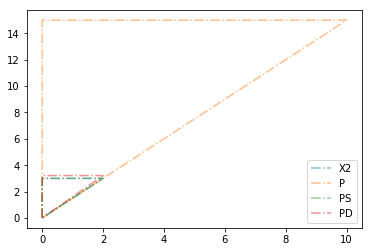

In [119]:
R,s = orthogonal_procrustes(X11, X12)
X23 = np.dot(X11,R)
X24 = s/np.sum(X11**2) * np.dot(X11,R)
X25 = X23 * np.nan_to_num(X22/X23.astype(int))
mx1, mx2, disp = procrustes(X11,X12)
t26 = make_triangle(np.nan_to_num(X23/mx1))
t23 = make_triangle(X23)
t24 = make_triangle(X24)
t25 = make_triangle(X25)
plt.plot(t22[:,0], t22[:,1], '-.', alpha=0.5, label='X2')
plt.plot(t23[:,0],t23[:,1],'-.',alpha=0.5,label='P')
plt.plot(t24[:,0],t24[:,1],'-.',alpha=0.5,label='PS')
plt.plot(t25[:,0],t25[:,1],'-.',alpha=0.5,label='PD')
#plt.plot(t26[:,0],t26[:,1],'-.',alpha=0.5,label='PSD')
plt.legend(loc=0)
plt.show()

#t13 = make_triangle(X13)
##plt.plot(t12[:,0], t12[:,1], '-.', alpha=0.5, label='X1')
#plt.plot(t13[:,0],t13[:,1],'-.',alpha=0.5,label='X1')
#plt.show()

In [71]:
from scipy.linalg import matrix_balance

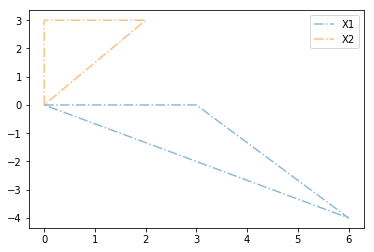

In [72]:
X21 = X1.copy()
X22 = np.dot(X21,rotation)
X21[2,:] *= 2
t21 = make_triangle(X21)
t22 = make_triangle(X22)
plt.plot(t21[:,0], t21[:,1], '-.', alpha=0.5, label='X1')
plt.plot(t22[:,0], t22[:,1], '-.', alpha=0.5, label='X2')
plt.legend(loc=0)
plt.show()

In [103]:
from scipy.spatial import procrustes

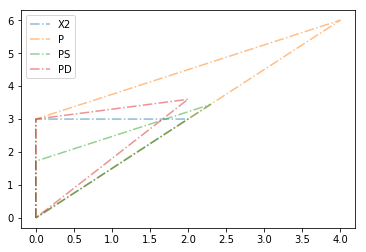

In [117]:
R,s = orthogonal_procrustes(X21, X22)
X23 = np.dot(X21,R)
X24 = s/np.sum(X21**2) * np.dot(X21,R)
X25 = X23 * np.nan_to_num(X22/X23.astype(int))
mx1, mx2, disp = procrustes(X1,X2)
t26 = make_triangle(np.nan_to_num(X23/mx1))
t23 = make_triangle(X23)
t24 = make_triangle(X24)
t25 = make_triangle(X25)
plt.plot(t22[:,0], t22[:,1], '-.', alpha=0.5, label='X2')
plt.plot(t23[:,0],t23[:,1],'-.',alpha=0.5,label='P')
plt.plot(t24[:,0],t24[:,1],'-.',alpha=0.5,label='PS')
plt.plot(t25[:,0],t25[:,1],'-.',alpha=0.5,label='PD')
#plt.plot(t26[:,0],t26[:,1],'-.',alpha=0.5,label='PSD')
plt.legend(loc=0)
plt.show()

In [89]:
print(X21)
print(X23 * np.nan_to_num(X22/X23.astype(int)))

[[ 0  0]
 [ 3  0]
 [ 6 -4]]
[[0.  0. ]
 [0.  3. ]
 [2.  3.6]]


In [ ]:
if self.test_case == 'rotation':
    R = orthogonal_procrustes(X1, X2)[0]
    return np.linalg.norm(np.dot(X1, R) - X2)
elif self.test_case == 'scalar-rotation':
    X1 -= np.mean(X1, axis=0) 
    X2 -= np.mean(X2, axis=0)
    R = orthogonal_procrustes(X1, X2)[0]
    return np.linalg.norm(np.dot(X1,R) - X2)
elif self.test_case == 'diagonal-rotation':
    normX1 = np.linalg.norm(X1)
    normX2 =  np.linalg.norm(X2)
    X1 /= normX1
    X2 /= normX2
    R,s = orthogonal_procrustes(X1, X2)
    X2 = np.dot(X2, R.T) * s
    return np.linalg.norm(X1 - X2)
elif self.test_case == 'scalar-diagonal-rotation':
    '''
    X1 = X1-np.mean(X1, 0)
    X2 = X1-np.mean(X2, 0)
    normX1 = np.linalg.norm(X1)
    normX2 =  np.linalg.norm(X2)
    X1 /= normX1
    X2 /= normX2
    R,s = orthogonal_procrustes(X1, X2)
    X2 = np.dot(X2, R.T)*s
    return np.linalg.norm(X1 - X2)
    '''
    mx1, mx2, disparity = procrustes(X1,X2)
    return disparity

In [ ]:

spt = SemiparametricTest(embedding='ase', test_case='rotation')
n = spt._difference_norm(points1, points2)
self.assertAlmostEqual(n, 0)

spt = SemiparametricTest(embedding='lse', test_case='rotation')
n = spt._difference_norm(points1, points2)
self.assertAlmostEqual(n, 0)

In [2]:
def perturb_latent_position(X, sigma):
    X2 = X + np.random.normal(loc=0, scale=sigma, size=X.shape)
    X2 = X2 / np.linalg.norm(X2, axis=0)
    return X2

def double_plot(A, X):
    fig, ax = plt.subplots(1, 2, figsize=(20,10))
    sns.heatmap(A, ax=ax[0], xticklabels=False, yticklabels=False, cbar=False, cmap='Blues')
    sns.scatterplot(X[:,0], X[:,1], ax=ax[1],alpha = 0.5,s=100)
    ax[1].get_xaxis().set_visible(False)
    ax[1].get_yaxis().set_visible(False)
    ax[0].set_title('Adjacency matrix', fontsize=FONTSIZE)
    ax[1].set_title('Adjacency spectral embedding',fontsize=FONTSIZE)
    return ax

In [4]:
k = 4 # the number of embedding dimensions for ASE
P = np.array([[0.9, 0.11, 0.13, 0.2],
              [0, 0.7, 0.1, 0.1], 
              [0, 0, 0.8, 0.1],
              [0, 0, 0, 0.85]])

P = symmetrize(P)
csize=50
A1 = binary_sbm([csize, csize, csize, csize], P)
X1 = AdjacencySpectralEmbed(k=k).fit_transform(A1)
#ax = double_plot(A1, X1)

In [5]:
A2 = rdpg(X1)
A3 = rdpg(X1)
A2 = symmetrize(A2)
A3 = symmetrize(A3)
Xhat2 = AdjacencySpectralEmbed(k=k).fit(A2).X
Xhat3 = AdjacencySpectralEmbed(k=k).fit(A3).X

#ax2 = double_plot(A2, Xhat2)
#ax2[0].set_ylabel('Sampled RDPG 1', fontsize=FONTSIZE)
#ax3 = double_plot(A3, Xhat3)
#ax3[0].set_ylabel('Sampled RDPG 2', fontsize=FONTSIZE)
#plt.show()